2017012022 -0.0034885953812499966
temp is [-0.00536212 -0.008185   -0.01021441 -0.01235087 -0.01498159 -0.01342469
 -0.0132827  -0.01269242 -0.01148239 -0.00963746 -0.00978671 -0.00915982
 -0.00951982 -0.00978381 -0.0100106  -0.01171855 -0.01271599 -0.01449204
 -0.01688853 -0.01983147 -0.02234747 -0.02527333 -0.02714552 -0.02870937
 -0.03088483 -0.03198429 -0.03063078 -0.02974991 -0.02812913 -0.02697888
 -0.02562915 -0.02410847 -0.02323243 -0.02238516 -0.02086557 -0.01866032
 -0.01982039 -0.01920663 -0.01800136 -0.01739919 -0.01656984 -0.01642849
 -0.01600929 -0.01840338 -0.02030671 -0.0219302  -0.02375695 -0.02550928
 -0.02769797 -0.03052227 -0.03303834 -0.03546067 -0.03729638 -0.03645018
 -0.03589824 -0.03645127 -0.03636576 -0.03709226 -0.03855453 -0.03854233
 -0.03998395 -0.04245316 -0.04375263 -0.04449037 -0.04526968 -0.04626707
 -0.04798448 -0.05045565 -0.05199545 -0.05363385 -0.05498579 -0.05562445]
result is [-0.00536212 -0.008185   -0.01021441 -0.01235087 -0.01498159 -0.0134246

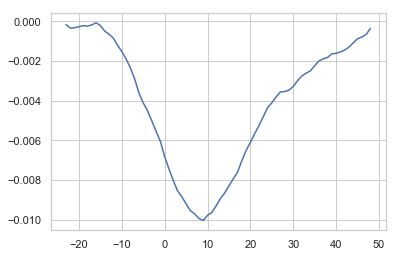

In [24]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf 
import statsmodels.api as sm

def array_plus(array_input):
    array_output = np.zeros(len(array_input))
    m = 0
    for i in range(len(array_input)):
        m += array_input[i]
        array_output[i] = m
    return array_output

#Function: calculate_CAR calculate_CAV 
def calculate_CAR(df,start,end):
    result = np.zeros(len(df))
    for i in range(len(df)):    
        try:
            for j in range(start,end+1):  #include start, start+1,...,end
                result[i] = result[i] + df.iloc[i+j]
        except:
            result[i] = 'NaN'
    return result

def calculate_CAV(df,start,end):
    result = np.zeros(len(df))
    for i in range(len(df)):    
        try:
            for j in range(start,end+1):  #include start, start+1,...,end
                result[i] = result[i] + df.iloc[i+j]
        except:
            result[i] = 'NaN'
    return result

# import bitcoin data
data = 'bitcoin_basic_data_2h_internal.csv'
df = pd.read_csv(data,encoding='utf-8')

# estimation window and calculate ER AR EV AV
Estimation_Window = 48
df['R'] = df['R'].rolling(10).mean()
df.R = df.R.shift(1)
df['ER'] = df['R'].rolling(Estimation_Window).mean()
df.ER = df.ER.shift(1)
df['AR'] = df['R'] - df['ER']

df.V = np.log(df['V'])
df['V'] = df['V'].rolling(10).mean()
df.V = df.V.shift(1)
df['EV'] = df['V'].rolling(48).mean()
df.EV = df.EV.shift(1)   
df['AV'] = df['V'] / df['EV']

# original CAR(-1,1) and CAR(2,5)
sign_from = -16  
sign_to = 1
rev_from = 2
rev_to = 19
df['CAR_N20_9'] = calculate_CAR(df['AR'],-20,9)
df['CAR_N20_N19'] = calculate_CAR(df['AR'],-20,-19)
df['CAR_10_50'] = calculate_CAR(df['AR'],10,50)
df['CAV_N20_9'] = calculate_CAV(df['AV'],-20,9)
df['CAV_N20_N19'] = calculate_CAV(df['AV'],-20,19)
#calculate_CAR(df['AR'],sign_from,sign_to)
#calculate_CAR(df['AR'],sign_from,sign_to)
#sign = calculate_CAR(df['AR'],sign_from,sign_to)  
#rev = calculate_CAR(df['AR'],rev_from,rev_to)
cav = calculate_CAV(df['AV'],-1,1)#,sign_to)
#df = pd.concat([df, pd.DataFrame(sign),pd.DataFrame(rev),pd.DataFrame(cav)], axis=1,ignore_index=True)

# asign a name
str1 = 'CAR_' + np.str(sign_from) +'_'+ np.str(sign_to)
str2 = 'CAR_' + np.str(rev_from) +'_'+ np.str(rev_to)
str3 = 'CAV_' + np.str(sign_from) +'_'+ np.str(sign_to)

#col_names = ['Time','P','V','R','ER','AR','EV','AV',str1,str2,str3]
#df.columns = col_names

#import the label
data1 = 'alabel.csv'  #label数据集
df_label = pd.read_csv(data1,encoding='utf-8')
label = np.array(df_label)

def label_short(df):
    result = np.zeros(len(df),dtype=int)
    for i in range(len(df)):
        if df.Time.iloc[i] in label:
            #print(df.Time.iloc[i],i)
            result[i] = 1
            #result[i,1] = df.Time.iloc[i]
        else:
            result[i] = 0
            #result[i,1] = df.Time.iloc[i]
    return result

short_label = label_short(df)
df = pd.concat([df, pd.DataFrame(short_label)], axis=1)
df = df.rename(columns={0:'Label'})
df = df.dropna(axis=0)

#draw the figure of price reversal
def price_reversal_figure_draw(df,start,end):
    L = np.abs(start) + np.abs(end)
    result = np.zeros(L)
    temp = np.zeros(L)
    count = 0
    avg_result = result
    for i in range(len(df)):
        if df.Label.iloc[i]==1:
            try:
                CAR_N = df.AR.iloc[i+start]
                print(df.Time.iloc[i],CAR_N)
                temp0 = array_plus(np.array(df.AR[i+start+1:i+end+1]))
                temp = CAR_N + temp0
                print("temp is",temp)
                result = result + temp
                print("result is", result)
                count = count+1
                print("count=",count)
            except:
                1
    if np.abs(count-0)>0.001:
        avg_result = result / count

    return avg_result

figure_start = -24
figure_end = 48
avg_result = price_reversal_figure_draw(df,figure_start,figure_end)
print(avg_result)

x=range(figure_start+1,figure_end+1)
plt.plot(x, avg_result)
plt.show()


2017012022 -0.002136462693749997
temp is [-0.00476718 -0.00321028 -0.00306829 -0.00247801 -0.00126798  0.00057695
  0.0004277   0.00105459  0.00069459  0.0004306   0.00020381 -0.00150414
 -0.00250158 -0.00427763 -0.00667412 -0.00961705 -0.01213306 -0.01505892
 -0.01693111 -0.01849496 -0.02067042 -0.02176988 -0.02041637 -0.0195355
 -0.01791471 -0.01676447 -0.01541474 -0.01389406 -0.01301802 -0.01217075
 -0.01065116 -0.00844591 -0.00960598 -0.00899222 -0.00778695 -0.00718478
 -0.00635543 -0.00621408 -0.00579488 -0.00818897 -0.0100923  -0.01171579
 -0.01354254 -0.01529487 -0.01748356 -0.02030786 -0.02282393 -0.02524626
 -0.02708197 -0.02623577 -0.02568383 -0.02623685 -0.02615135 -0.02687785
 -0.02834011 -0.02832792 -0.02976953 -0.03223875 -0.03353822 -0.03427596
 -0.03505527 -0.03605266 -0.03777007 -0.04024124 -0.04178103 -0.04341944
 -0.04477137 -0.04541004]
result is [-0.00476718 -0.00321028 -0.00306829 -0.00247801 -0.00126798  0.00057695
  0.0004277   0.00105459  0.00069459  0.0004306 

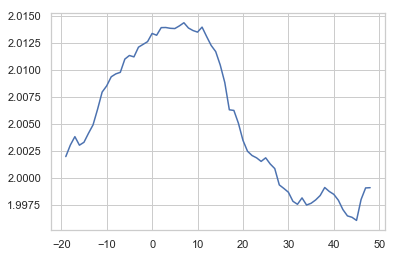

In [25]:
def price_reversal_figure_draw1(df,start,end):
    L = np.abs(start) + np.abs(end)
    result = np.zeros(L)
    temp = np.zeros(L)
    count = 0
    avg_result = result
    for i in range(len(df)):
        if df.Label.iloc[i]==1:
            try:
                CAV_N = df.AV.iloc[i+start]
                print(df.Time.iloc[i],CAV_N)
                temp0 = np.array(df.AV[i+start+1:i+end+1]) #array_plus(np.array(df.AV[i+start+1:i+end+1]))
                temp = CAV_N + temp0
                print("temp is",temp)
                result = result + temp
                print("result is", result)
                count = count+1
                print("count=",count)
            except:
                1
    if np.abs(count-0)>0.001:
        avg_result = result / count

    return avg_result

figure_start = -20
figure_end = 48
avg_result = price_reversal_figure_draw(df,figure_start,figure_end)
print(avg_result)

figure_start = -20
figure_end = 48
avg_result1 = price_reversal_figure_draw1(df,figure_start,figure_end)
print(avg_result1)

x=range(figure_start+1,figure_end+1)
#plt.plot(x, avg_result)

x=range(figure_start+1,figure_end+1)
plt.plot(x, avg_result1)
plt.show()

In [27]:
df1 = df[df['Label']==1]

In [31]:
model_1 = smf.ols("df1.CAR_10_50 ~ df1.CAR_N20_N19 + df1.CAR_N20_9",data = df1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          df1.CAR_10_50   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     111.7
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           2.67e-40
Time:                        17:44:58   Log-Likelihood:                 641.48
No. Observations:                 465   AIC:                            -1277.
Df Residuals:                     462   BIC:                            -1265.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0048      0.003      1.677      0.094      -0.001       0.010
df1.CAR_N20_N19     0.1387      0.368      0.377      0.706      -0.584       0.862
df1.CAR_N20_9      -0.5939      0.041    -14.391      0.000      -0.675      -0.513
==============================================================================
Omnibus:                       17.996   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.576
Skew:                           0.209   Prob(JB):                     3.10e-08
Kurtosis:                       4.269   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# SIGN = df1.CAR_N20_9 - df1.CAR_N20_N19
model_2 = smf.ols("df1.CAV_N20_9  ~ df1.CAR_N20_9 + df1.CAV_N20_N19 ",data = df1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          df1.CAV_N20_9   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1375.
Date:                Sun, 15 Aug 2021   Prob (F-statistic):          2.99e-195
Time:                        17:45:22   Log-Likelihood:                -471.16
No. Observations:                 465   AIC:                             948.3
Df Residuals:                     462   BIC:                             960.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.7388      0.631     -4.344      0.000      -3.978      -1.500
df1.CAR_N20_9       1.3712      0.434      3.159      0.002       0.518       2.224
df1.CAV_N20_N19     0.8181      0.016     52.380      0.000       0.787       0.849
==============================================================================
Omnibus:                        8.479   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.582
Skew:                          -0.230   Prob(JB):                      0.00830
Kurtosis:                       3.532   Cond. No.                         826.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""